## Paso 1: Carga del conjunto de datos - Loading the dataset

In [1]:
import pandas as pd

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv finales/comunidades_FINAL_1500.csv')

# Mostrar el contenido del dataframe
print(dataframe)


              com. autonoma  provincia descripción   precio  habitaciones   m²
0                 Andalucía    Almería      Chalet   179900             3  114
1                 Andalucía    Almería        Piso   210600             3  141
2                 Andalucía    Almería        Piso   210000             4  153
3                 Andalucía    Almería        Piso    83000             2   64
4                 Andalucía    Almería      Chalet   229000             5  150
...                     ...        ...         ...      ...           ...  ...
22035  Comunidad Valenciana   Valencia      Duplex  1575000             6   96
22036  Comunidad Valenciana   Alicante      Chalet  1949000             4  282
22037  Comunidad Valenciana  Castellón      Duplex   190000             3   98
22038  Comunidad Valenciana   Valencia      Chalet   385000             4   66
22039  Comunidad Valenciana   Valencia      Chalet   350000             3  212

[22040 rows x 6 columns]


## Paso 2: EDA - exploratory data analysis

In [2]:
# Obtener las dimensiones
dataframe.shape

(22040, 6)

- El dataframe tiene 22040 filas y 6 columnas.
- The dataframe has 22040 rows and 6 columns.



In [3]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22040 entries, 0 to 22039
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   com. autonoma  22040 non-null  object
 1   provincia      22040 non-null  object
 2   descripción    22040 non-null  object
 3   precio         22040 non-null  int64 
 4   habitaciones   22040 non-null  int64 
 5   m²             22040 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.0+ MB


In [4]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

In [5]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['com. autonoma', 'provincia', 'descripción']
['precio', 'habitaciones', 'm²']


## duplicados - duplicates

In [6]:
#ver duplicados

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv finales/comunidades_FINAL_1500.csv')

# Verificar duplicados
duplicados = dataframe[dataframe.duplicated()]

if duplicados.empty:
    print("No se encontraron duplicados en el DataFrame.")
    print("No duplicates were found in the DataFrame.")
else:
    print("Duplicados encontrados:")
    print("Duplicates found:")
    print(duplicados)


No se encontraron duplicados en el DataFrame.
No duplicates were found in the DataFrame.


## análisis categórico - categorical analysis

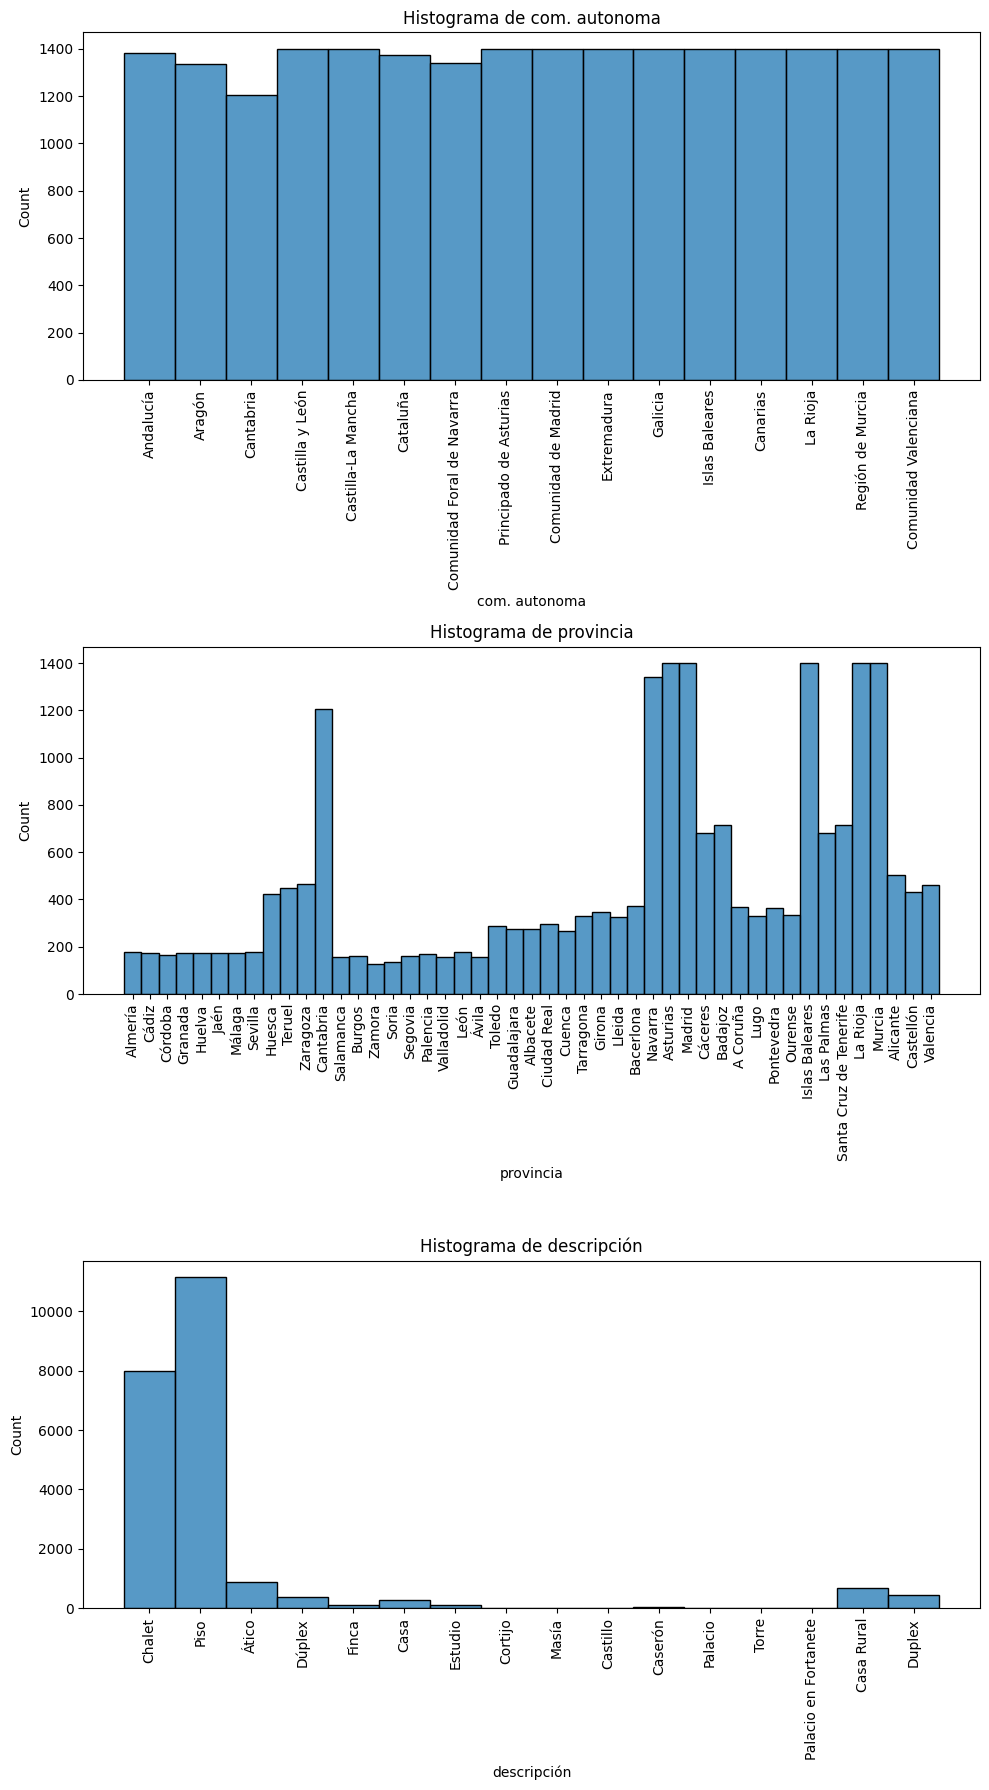

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Crear histograma para 'com. autonoma'
sns.histplot(ax=axes[0], data=dataframe, x='com. autonoma')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Histograma de com. autonoma')

# Crear histograma para 'provincia'
sns.histplot(ax=axes[1], data=dataframe, x='provincia')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Histograma de provincia')

# Crear histograma para 'descripción'
sns.histplot(ax=axes[2], data=dataframe, x='descripción')
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_title('Histograma de descripción')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- En el histograma de 'com. autonoma', se excluyen Ceuta y Melilla debido a la falta de datos. La mayoría de las comunidades autónomas tienen un recuento de listados de viviendas que oscila entre 1,200 y 1,400.

- En el histograma de 'provincia', se muestran todas las provincias, y el recuento de viviendas varía entre 200 y 1,400, ya que algunas comunidades autónomas solo tienen una provincia, como Madrid o Cantabria.

- En el histograma de 'descripción' (tipo de vivienda), se observa que la mayoría de las viviendas son pisos seguido de chalets. En un rango mas bajo tenemos ático, dúplex o casa rural.
---
- In the histogram for 'com. autonoma', Ceuta and Melilla are excluded due to lack of data. Most of the Autonomous Communities have a housing list count ranging between 1,200 and 1,400.

- In the 'province' histogram, all provinces are shown, and the dwelling count varies between 200 and 1,400, as some Autonomous Communities only have one province, such as Madrid or Cantabria.

- In the histogram of 'description' (type of dwelling), it can be seen that most of the dwellings are flats followed by villas. In a lower range we have penthouse, duplex or rural house.

## análisis numérico - numerical analysis

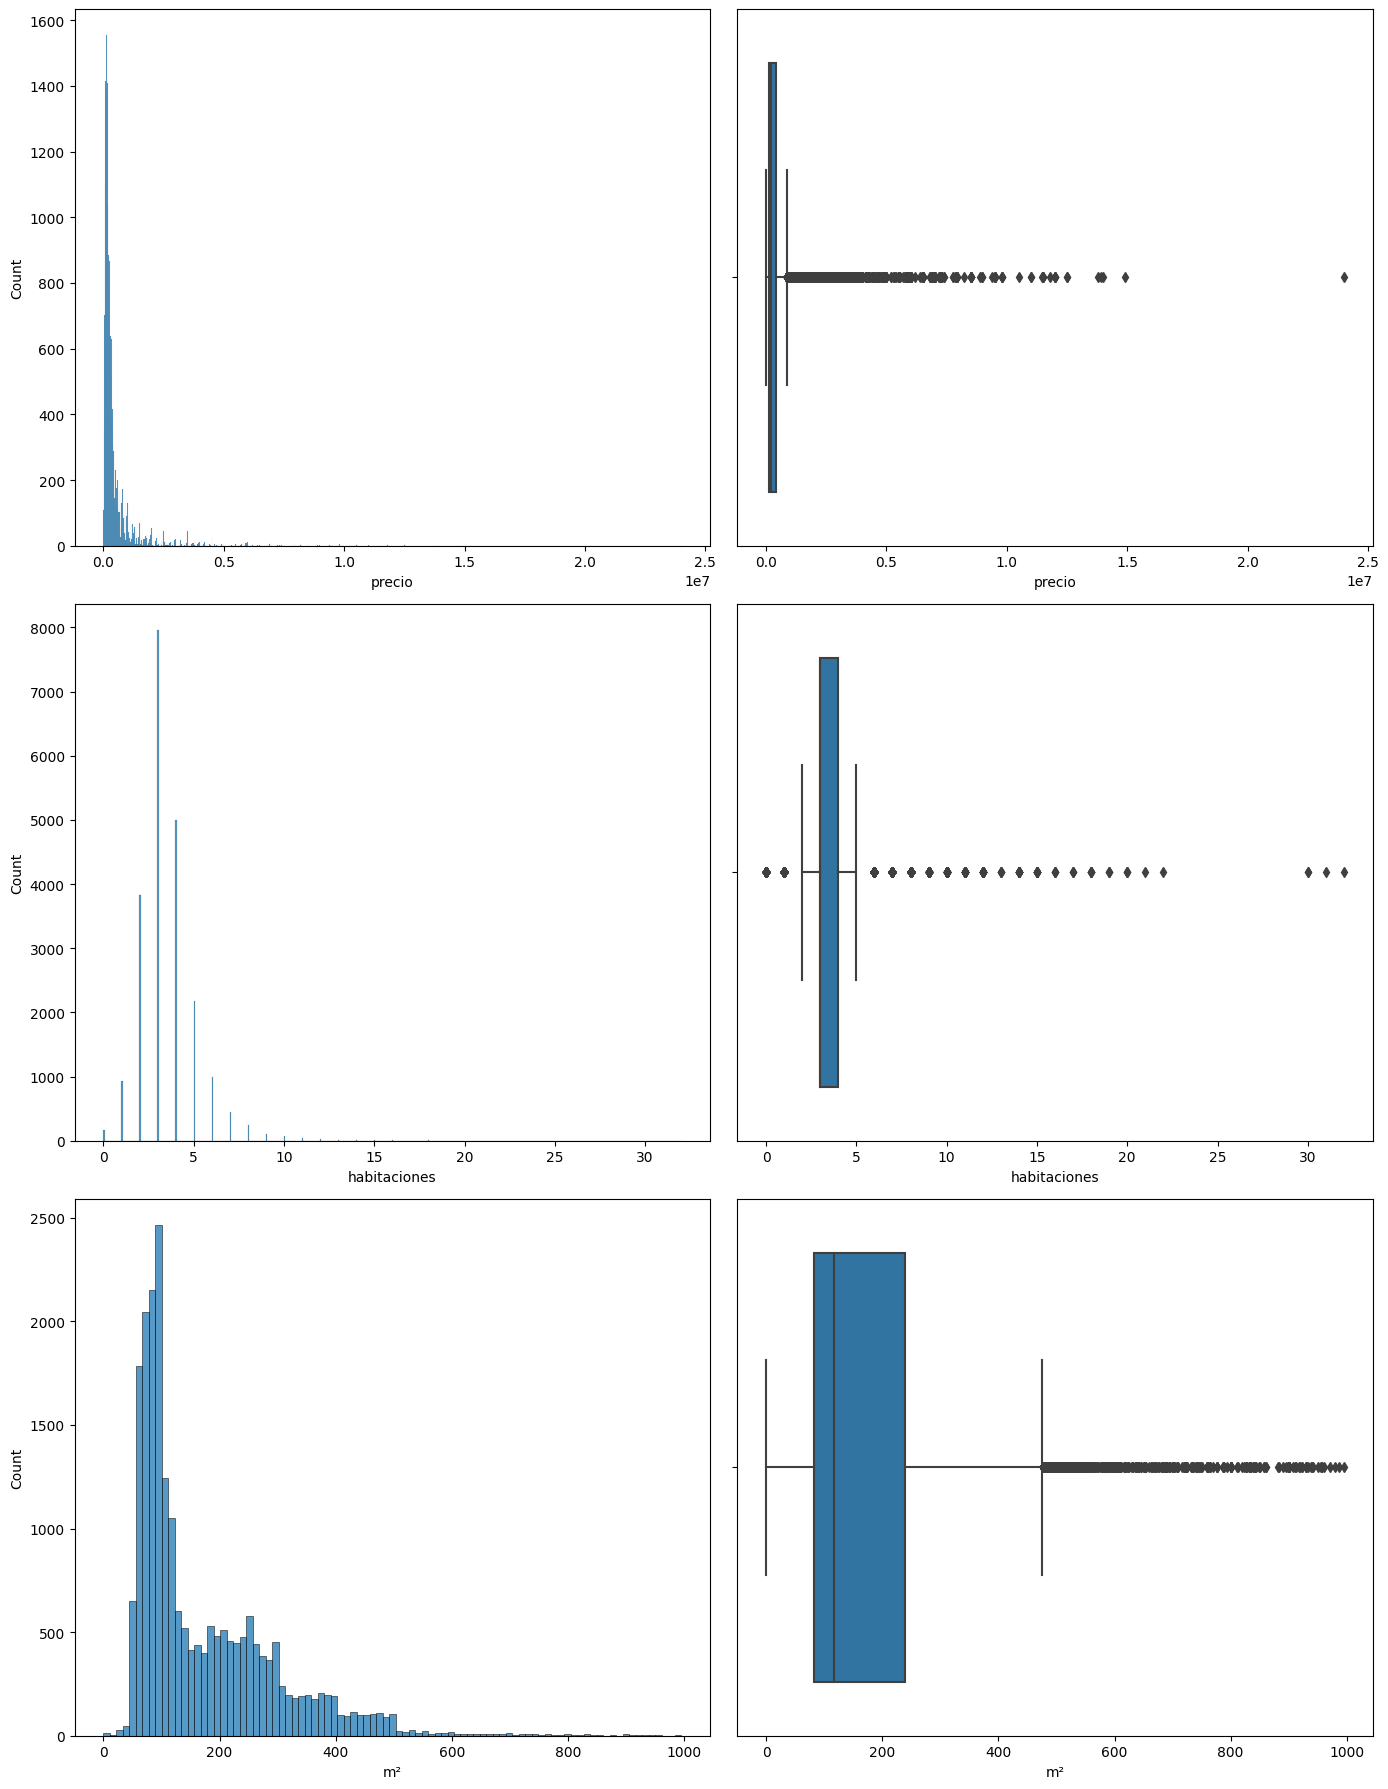

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 3 filas y 2 columnas
fig, axis = plt.subplots(3, 2, figsize=(14, 18))

# Gráficos de las variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="precio")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="precio")
sns.histplot(ax=axis[1, 0], data=dataframe, x="habitaciones")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="habitaciones")
sns.histplot(ax=axis[2, 0], data=dataframe, x="m²")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="m²")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


- En "precio" y "habitaciones", se observan valores atípicos (outliers) que se encuentran fuera del rango normal por lo que prodeceremos a eliminarlos

- En "m²", los outliers están más concentrados y no son tan extremos en comparación con "precio" y "habitaciones".
---
- In "precio" and "rooms", we observe outliers that are outside the normal range, so we will proceed to eliminate them.

- In "m²", the outliers are more concentrated and not as extreme compared to "price" and "rooms".

## análisis categórico-categórico - categorical-categorical analysis

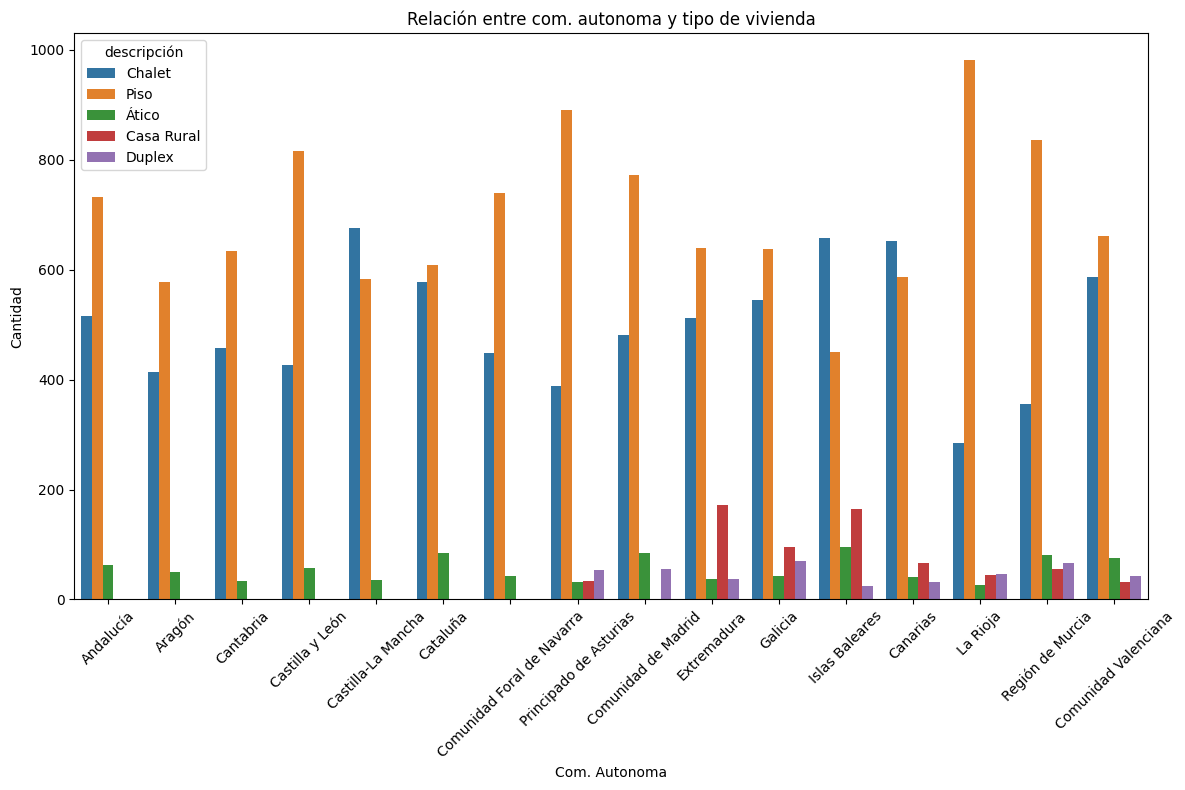

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las 10 provincias más importantes
top_10_provincias = dataframe['descripción'].value_counts().nlargest(5).index

# Filtrar el DataFrame solo para las 10 provincias más importantes
dataframe_top_10_provincias = dataframe[dataframe['descripción'].isin(top_10_provincias)]

# Crear una figura de subplots
fig, axes = plt.subplots(figsize=(12, 8))

# Crear un gráfico de barras para analizar 'com. autonoma' vs 'provincia'
sns.countplot(data=dataframe_top_10_provincias, x='com. autonoma', hue='descripción', ax=axes)
axes.set_title('Relación entre com. autonoma y tipo de vivienda')
axes.set_xlabel('Com. Autonoma')
axes.set_ylabel('Cantidad')

# Rotar las etiquetas del eje x para mayor legibilidad
axes.tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- El gráfico muestra la relación entre las comunidades autónomas y el tipo de vivienda en las 10 provincias más importantes. En su mayoría, las viviendas son de tipo "piso", excepto en Castilla y León, Islas Baleares y Canarias, donde predominan los "chalets". Otras categorías, como "ático", "casa rural" o "dúplex", tienen una presencia mucho menor en estas provincias.
---
- The graph shows the relationship between the autonomous communities and the type of housing in the 10 most important provinces. Most of the dwellings are of the "piso" type, except in Castilla y León, the Balearic Islands and the Canary Islands, where "chalets" predominate. Other categories, such as "penthouse", "country house" or "duplex", have a much smaller presence in these provinces.

## análisis númerico-númerico  - numerical-numerical analysis 

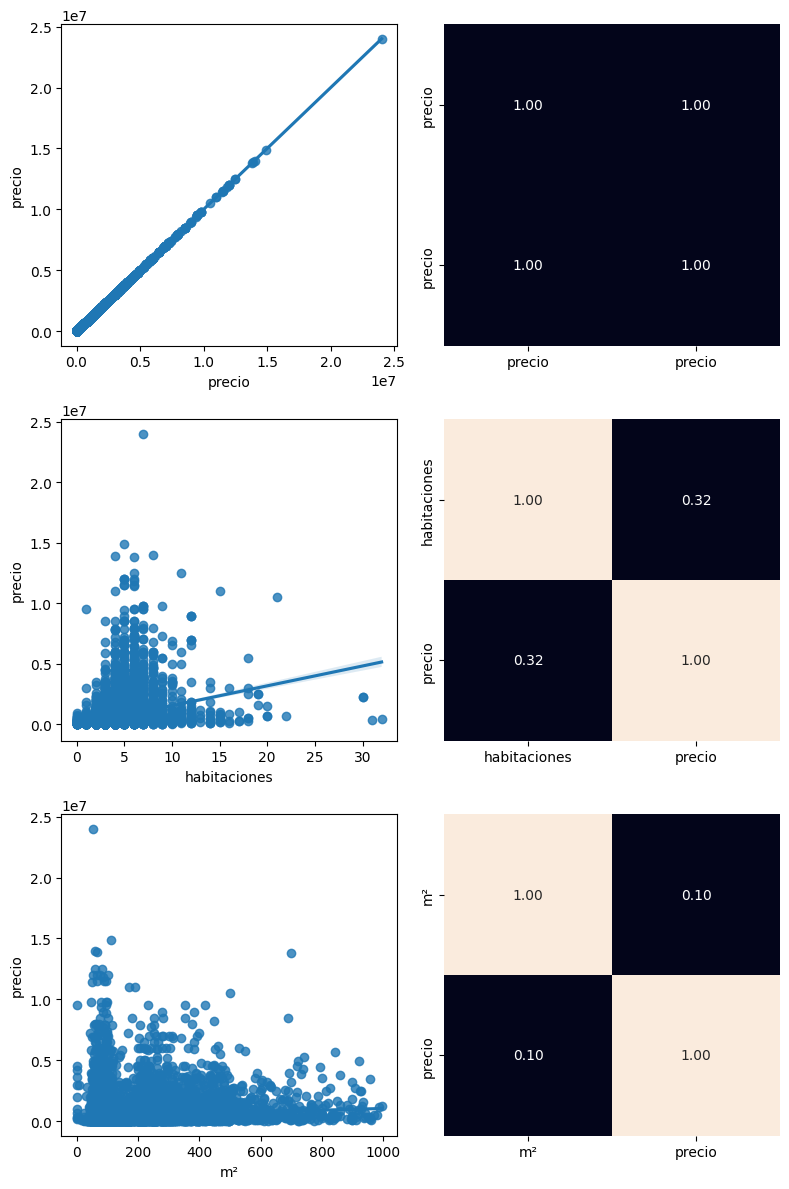

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_vivienda = ['precio', 'habitaciones', 'm²']

# Crear una figura de subplots con configuración de filas y columnas
num_rows_vivienda = len(numeric_variables_vivienda)
fig_vivienda, axis_vivienda = plt.subplots(num_rows_vivienda, 2, figsize=(8, 4*num_rows_vivienda))

# Generar los gráficos de dispersión y las matrices de correlación para las variables numéricas
for i, var in enumerate(numeric_variables_vivienda):
    sns.regplot(ax=axis_vivienda[i, 0], data=dataframe, x=var, y="precio")
    sns.heatmap(dataframe[[var, "precio"]].corr(), annot=True, fmt=".2f", ax=axis_vivienda[i, 1], cbar=False)
    axis_vivienda[i, 0].set_ylabel("precio")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- La cantidad de habitaciones tiene una correlación positiva moderada con el precio (0.32), lo que sugiere que un mayor número de habitaciones tiende a aumentar el precio.
- La correlación de m² con el precio es débil (0.10), lo que indica que el tamaño de la vivienda tiene menos influencia en su precio en comparación con la cantidad de habitaciones.
---
- The number of rooms has a moderate positive correlation with price (0.32), suggesting that a higher number of rooms tends to increase the price.
- The correlation of m² with price is weak (0.10), indicating that the size of the dwelling has less influence on its price compared to the number of rooms.

## categórico a numérico - categorical to numerical

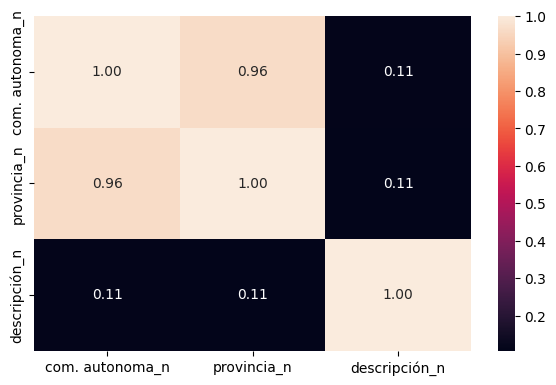

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame
dataframe_copy = dataframe.copy()

fig, axis = plt.subplots(figsize=(6, 4))

# Convert categorical columns to numerical using factorize on the copied DataFrame
dataframe_copy['com. autonoma_n'] = pd.factorize(dataframe_copy['com. autonoma'])[0]
dataframe_copy['provincia_n'] = pd.factorize(dataframe_copy['provincia'])[0]
dataframe_copy['descripción_n'] = pd.factorize(dataframe_copy['descripción'])[0]

# Plot the correlation heatmap
sns.heatmap(dataframe_copy[['com. autonoma_n', 'provincia_n', 'descripción_n']].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

- Existe una fuerte correlación positiva (0.96) entre la variable "com. autonoma" y "provincia", lo que sugiere una relación significativa entre la comunidad autónoma y la provincia en los datos.
- La correlación entre "com. autonoma" y "descripción" es baja (0.11), indicando una relación débil entre la comunidad autónoma y el tipo de vivienda.
- La correlación entre "provincia" y "descripción" también es baja (0.11), lo que sugiere una relación débil entre la provincia y el tipo de vivienda en los datos.
---
- There is a strong positive correlation (0.96) between the variable "com. autonoma" and "provincia", suggesting a significant relationship between the autonomous community and the province in the data.
- The correlation between "com. autonoma" and "description" is low (0.11), indicating a weak relationship between the autonomous community and the type of dwelling.
- The correlation between "provincia" and "description" is also low (0.11), suggesting a weak relationship between province and dwelling type in the data.

## análisis  correlaciones - correlation analysis

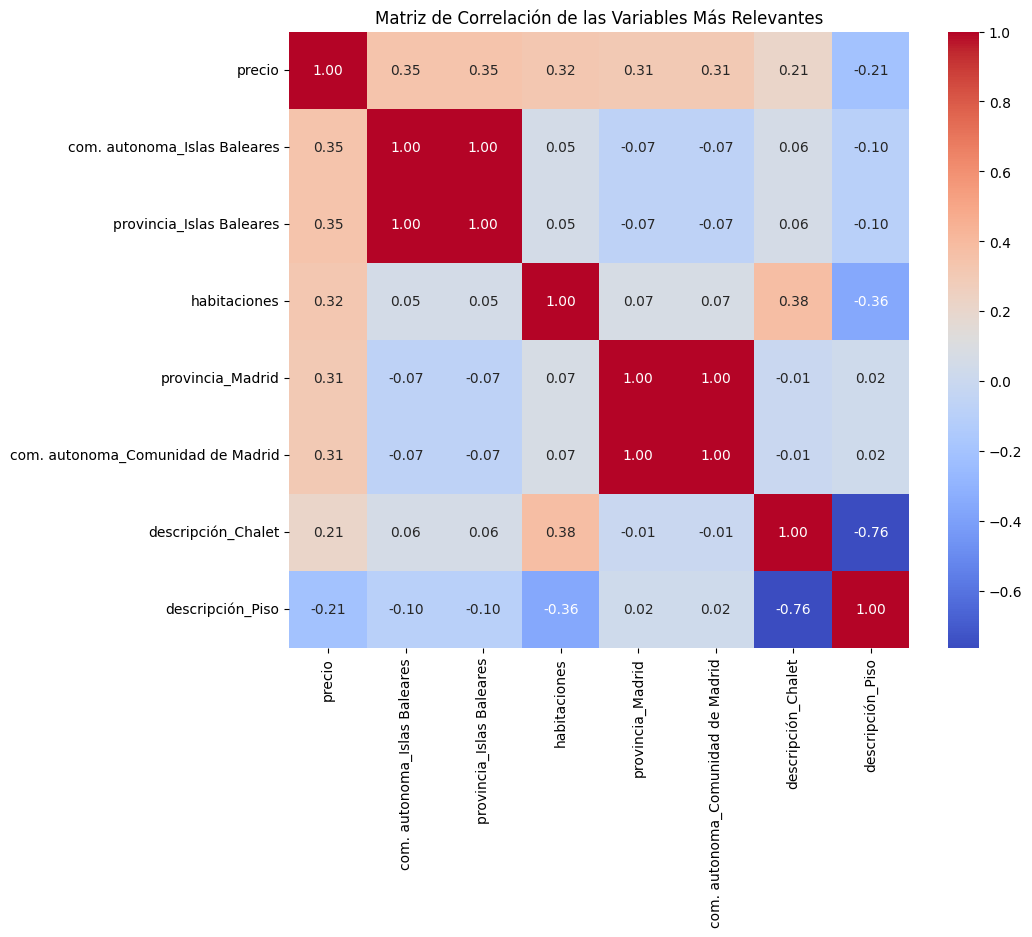

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Realizar one-hot encoding para las variables categóricas
dataframe_encoded = pd.get_dummies(dataframe, columns=['com. autonoma', 'provincia', 'descripción'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = dataframe_encoded.corr()

# Seleccionar las N variables más correlacionadas con 'precio'
N = 8  
top_correlated_features = correlation_matrix['precio'].abs().sort_values(ascending=False).head(N).index

# Filtrar la matriz de correlación para incluir solo las variables seleccionadas
correlation_matrix_filtered = correlation_matrix.loc[top_correlated_features, top_correlated_features]

# Visualizar la matriz de correlación filtrada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de las Variables Más Relevantes")
plt.show()


- Las variables "com. autonoma_islas baleares" y "provincia_islas baleares" tienen una correlación  fuerte con el precio (0.35), lo que indica una influencia significativa de esta comunidad autónoma y provincia en los precios.

- La cantidad de "habitaciones" también muestra una correlación positiva moderada con el precio (0.32), lo que sugiere que el número de habitaciones tiene un impacto en los precios.

- Las variables "provincia_madrid" y "com. autonoma_comunidad de madrid" tienen correlaciones positivas (0.31), lo que indica que Madrid, tanto como provincia como comunidad autónoma, también influye en los precios de vivienda.

- El tipo de vivienda "descripcion_chalet" muestra una correlación positiva moderada con el precio (0.21).

- Fuerte correlación positiva (0.38) entre la cantidad de "habitaciones" y el tipo de vivienda "descripcion_chalet".
---
- The variables "com. autonoma_islas baleares" and "provincia_islas baleares" have a strong correlation with price (0.35), indicating a significant influence of this autonomous community and province on prices.

- The number of "habitaciones" also shows a moderate positive correlation with price (0.32), suggesting that the number of rooms has an impact on prices.

- The variables "provincia_madrid" and "com. autonoma_comunidad de madrid" have positive correlations (0.31), indicating that Madrid, both as a province and as an autonomous community, also influences house prices.

- The house type "descripcion_chalet" shows a moderate positive correlation with price (0.21).

- Strong positive correlation (0.38) between the number of "rooms" and the housing type "descripcion_chalet".

## analizamos las mejores variables

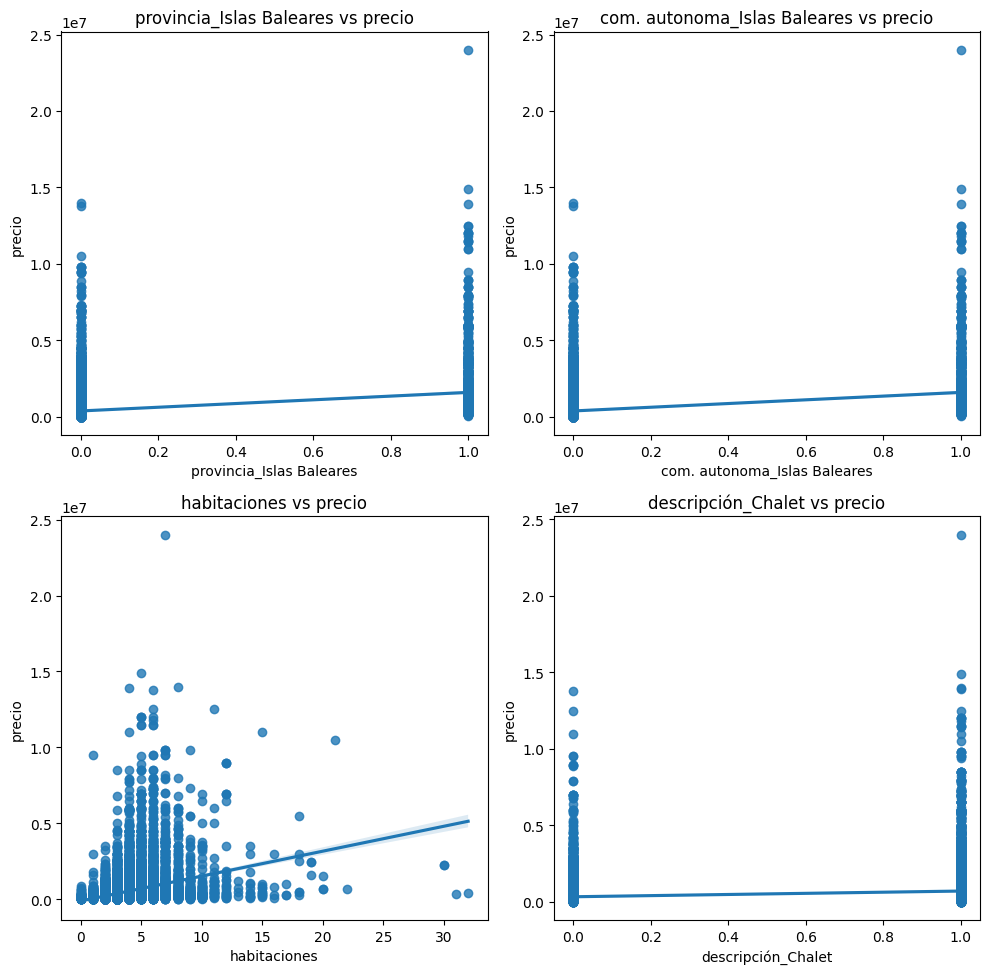

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame con las variables seleccionadas
variables_seleccionadas = dataframe_encoded[['provincia_Islas Baleares', 'com. autonoma_Islas Baleares', 'habitaciones', 'descripción_Chalet', 'precio']]

# Crear una figura de subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)

# Realizar gráficos de dispersión para las variables seleccionadas
sns.regplot(ax=axes[0, 0], data=variables_seleccionadas, x='provincia_Islas Baleares', y='precio')
axes[0, 0].set_title('provincia_Islas Baleares vs precio')

sns.regplot(ax=axes[0, 1], data=variables_seleccionadas, x='com. autonoma_Islas Baleares', y='precio')
axes[0, 1].set_title('com. autonoma_Islas Baleares vs precio')

sns.regplot(ax=axes[1, 0], data=variables_seleccionadas, x='habitaciones', y='precio')
axes[1, 0].set_title('habitaciones vs precio')

sns.regplot(ax=axes[1, 1], data=variables_seleccionadas, x='descripción_Chalet', y='precio')
axes[1, 1].set_title('descripción_Chalet vs precio')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- Los gráficos de regplot sugiere la existencia de valores atípicos en las cuatro variables analizadas (provincia_Islas Baleares, com. autonoma_Islas Baleares, habitaciones y descripción_Chalet) en relación con el precio de las viviendas. Los observaremos mas adelante y eliminaremos si es necesario.
---
- The regplot plots suggest the existence of outliers in the four variables analysed (provincia_Islas Baleares, com. autonoma_Islas Baleares, habitaciones y descripción_Chalet) in relation to the price of dwellings. We will observe them later and eliminate them if necessary.

## dibujamos pairplot - we draw pairplot

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


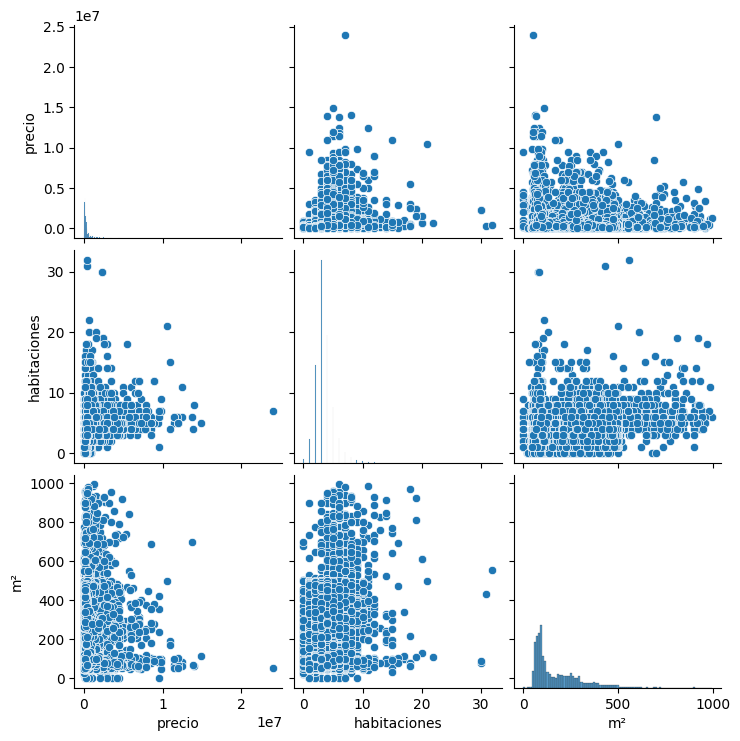

In [14]:
sns.pairplot(dataframe)

## análisis descriptivo - descriptive analysis

In [15]:
# Establecer el formato de punto flotante
pd.options.display.float_format = '{:.2f}'.format

# Realizar el análisis descriptivo
dataframe.describe()



,precio,habitaciones,m²
count,22040.00,22040.00,22040.00
mean,460055.60,3.52,173.00
std,855436.37,1.68,125.14
min,25.00,0.00,0.00
25%,129900.00,3.00,83.00
50%,220000.00,3.00,117.00
75%,419000.00,4.00,240.00
max,24000000.00,32.00,995.00


## outliers

In [16]:
'''print(variables_seleccionadas.dtypes)
'''

'print(variables_seleccionadas.dtypes)\n'

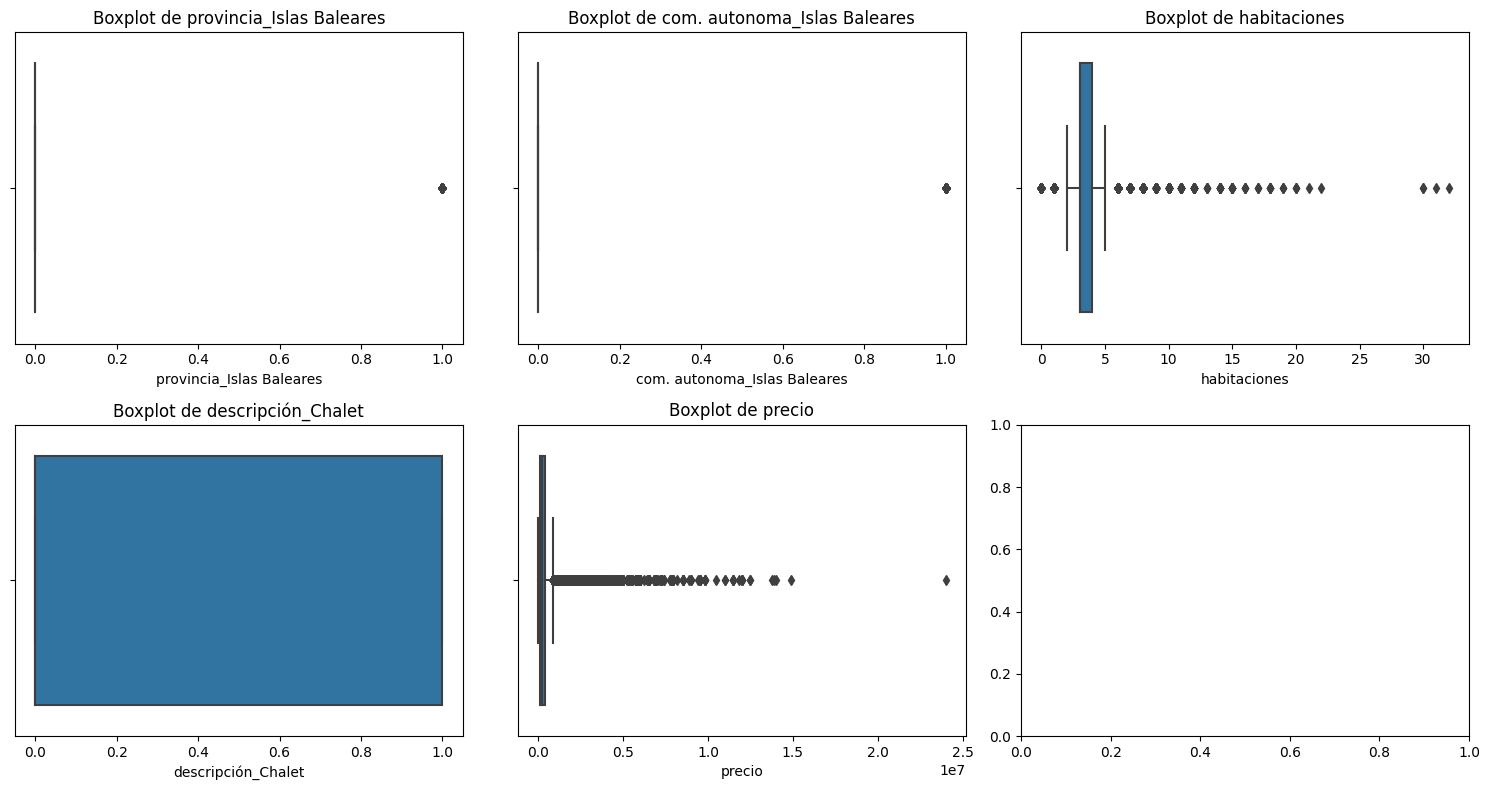

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir columnas booleanas en numéricas usando .loc
variables_seleccionadas.loc[:, 'provincia_Islas Baleares'] = variables_seleccionadas['provincia_Islas Baleares'].astype(int)
variables_seleccionadas.loc[:, 'com. autonoma_Islas Baleares'] = variables_seleccionadas['com. autonoma_Islas Baleares'].astype(int)
variables_seleccionadas.loc[:, 'descripción_Chalet'] = variables_seleccionadas['descripción_Chalet'].astype(int)

# Crear una figura de subplots con 2 filas y 3 columnas (excluimos 'precio')
fig, axes = plt.subplots(figsize=(15, 8), nrows=2, ncols=3)

# Realizar boxplots para detectar outliers
for i, variable in enumerate(variables_seleccionadas.columns):  # Incluimos todas las columnas
    sns.boxplot(ax=axes[i//3, i%3], data=variables_seleccionadas, x=variable)
    axes[i//3, i%3].set_title(f'Boxplot de {variable}')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- 'precio': Se identifican outliers , lo que sugiere la presencia de valores extremadamente altos en los precios de las viviendas.

- 'provincia_Islas Baleares' y 'com. autonoma_Islas Baleares': Ambas tienen outliers, lo que indica una presencia inusual de estos valores.

- 'habitaciones': Se detectan tres outliers con valores extremadamente altos, a partir de aproximadamente 30 habitaciones, lo que podría indicar errores en los datos o propiedades inusuales como un palacio.

- 'descripción_Chalet': No se observan outliers significativos en esta variable.
---
- precio': Outliers are identified, suggesting the presence of extremely high values in house prices.

- 'provincia_Islas Baleares' and 'com. autonoma_Islas Baleares': Both have outliers, indicating an unusual presence of these values.

- habitaciones': Three outliers are detected with extremely high values, starting at about 30 rooms, which could indicate data errors or unusual properties such as a palace.

- descripción_Chalet': No significant outliers are observed in this variable.

## analizamos outliers de cada variables

In [18]:
# Variables numéricas seleccionadas
numeric_variables = ['precio', 'habitaciones', 'm²']

# Iterar sobre las variables numéricas
for variable in numeric_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    # Ajustar los límites para conservar los valores que mencionaste
    if variable == 'precio':
        upper_limit = 2.5 * variable_iqr
    elif variable == 'habitaciones':
        upper_limit = 30  # Conservar habitaciones hasta 30

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")

    # Filtrar y eliminar outliers
    outliers = dataframe[(dataframe[variable] > upper_limit) | (dataframe[variable] < lower_limit)]
    dataframe = dataframe.drop(outliers.index)

# Mostrar el número de filas después de eliminar outliers
print(f"Número de filas después de eliminar outliers: {len(dataframe)}")


count      22040.00
mean      460055.60
std       855436.37
min           25.00
25%       129900.00
50%       220000.00
75%       419000.00
max     24000000.00
Name: precio, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en precio son 722750.0 y -303750.0, con un rango intercuartílico de 289100.0

count   18959.00
mean        3.31
std         1.49
min         0.00
25%         2.00
50%         3.00
75%         4.00
max        32.00
Name: habitaciones, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en habitaciones son 30 y -1.0, con un rango intercuartílico de 2.0

count   18957.00
mean      165.91
std       116.63
min         0.00
25%        83.00
50%       115.00
75%       229.00
max       980.00
Name: m², dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en m² son 448.0 y -136.0, con un rango intercuartílico de 146.0

Número de filas después de eliminar outliers: 18378


- Después de eliminar los valores atípicos en las variables numéricas 'precio', 'habitaciones' y 'm²' utilizando el método de los límites superior e inferior basados en el rango intercuartílico, el conjunto de datos se reduce a 18378 filas, por lo que se han eliminado datos extremadamente fuera de lo común para intentar mejorar la calidad del análisis
--- 
- After removing outliers in the numerical variables 'price', 'rooms' and 'm²' using the upper and lower bounds method based on the interquartile range, the dataset is reduced to 18378 rows, so extremely outliers have been removed in an attempt to improve the quality of the analysis.

## Análisis de valores faltantes - Missing value analysis

In [19]:

dataframe.isnull().sum()

com. autonoma    0
provincia        0
descripción      0
precio           0
habitaciones     0
m²               0
dtype: int64

- El DataFrame no contiene valores nulos en ninguna de sus columnas.
- The DataFrame does not contain null values in any of its columns.

In [20]:
'''# Imprimir los nombres de las columnas
print("Nombres de las columnas:")
print(dataframe.columns)

# Obtener y mostrar los tipos de dato de cada columna
column_types = dataframe.dtypes
print("\nTipos de dato de cada columna:")
print(column_types)
'''

'# Imprimir los nombres de las columnas\nprint("Nombres de las columnas:")\nprint(dataframe.columns)\n\n# Obtener y mostrar los tipos de dato de cada columna\ncolumn_types = dataframe.dtypes\nprint("\nTipos de dato de cada columna:")\nprint(column_types)\n'

## Escalado Mínimo-Máximo - Minimum-Maximum Scaling

In [23]:

from sklearn.preprocessing import MinMaxScaler

# Variables numéricas seleccionadas
numeric_variables = ['precio', 'habitaciones', 'm²']

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado mínimo-máximo a las variables numéricas
dataframe[numeric_variables] = scaler.fit_transform(dataframe[numeric_variables])

# Mostrar el DataFrame con las variables escaladas para cinco comunidades autónomas diferentes
communities_to_display = ['Andalucía', 'Cataluña', 'Madrid', 'Valencia', 'Galicia']
filtered_dataframe = dataframe[dataframe['com. autonoma'].isin(communities_to_display)]
print(filtered_dataframe.head())


  com. autonoma provincia descripción  precio  habitaciones   m²
0     Andalucía   Almería      Chalet    0.25          0.14 0.25
1     Andalucía   Almería        Piso    0.29          0.14 0.31
2     Andalucía   Almería        Piso    0.29          0.18 0.34
3     Andalucía   Almería        Piso    0.12          0.09 0.14
4     Andalucía   Almería      Chalet    0.32          0.23 0.33


## dividimos datos para crear TRAIN y TEST - split data to create TRAIN and TEST

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Variables numéricas seleccionadas
numeric_variables = ['precio', 'habitaciones', 'm²']

# Dividir el DataFrame en características (X) y variable objetivo (y)
X = dataframe[numeric_variables]
y = dataframe['precio']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SelectKBest para seleccionar las mejores características
k_best_selector = SelectKBest(score_func=f_regression, k=3)  # Seleccionar las 3 mejores características
X_train_selected = k_best_selector.fit_transform(X_train, y_train)
X_test_selected = k_best_selector.transform(X_test)

# Obtener los índices de las características seleccionadas
selected_indices = k_best_selector.get_support(indices=True)

# Mostrar las columnas seleccionadas
selected_columns = [X.columns[i] for i in selected_indices]
print("Características seleccionadas:", selected_columns)

# Mostrar las primeras filas de los conjuntos de entrenamiento y prueba con las características seleccionadas
print("\nConjunto de TRAIN con características seleccionadas:")
df_train_selected = pd.DataFrame(X_train_selected, columns=selected_columns)
print(df_train_selected.head())

print("\nConjunto de TEST con características seleccionadas:")
df_test_selected = pd.DataFrame(X_test_selected, columns=selected_columns)
print(df_test_selected.head())

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
df_train_selected.to_csv('train_selected.csv', index=False)
df_test_selected.to_csv('test_selected.csv', index=False)
print("\nConjunto de TRAIN y TEST exportados")



Características seleccionadas: ['precio', 'habitaciones', 'm²']

Conjunto de TRAIN con características seleccionadas:
   precio  habitaciones   m²
0    0.10          0.18 0.31
1    0.21          0.14 0.18
2    0.69          0.27 0.56
3    0.25          0.14 0.24
4    0.32          0.18 0.40

Conjunto de TEST con características seleccionadas:
   precio  habitaciones   m²
0    0.07          0.18 0.44
1    0.69          0.18 0.53
2    0.13          0.18 0.25
3    0.20          0.14 0.25
4    0.05          0.09 0.25

Conjunto de TRAIN y TEST exportados


- Se ha realizado una selección de características utilizando SelectKBest y f_regression en las variables numéricas. Las tres características seleccionadas como las más relevantes para predecir el precio son 'precio', 'habitaciones' y 'm²'. Estas características se han dividido en conjuntos de entrenamiento y prueba, que estan preparados para utilizarse en modelos de aprendizaje automático para predecir el precio de las viviendas con las características más influyentes.
---
- A feature selection has been performed using SelectKBest and f_regression on the numerical variables. The three features selected as the most relevant for predicting price are 'price', 'rooms' and 'm²'. These features have been divided into training and test sets, which are ready to be used in machine learning models to predict the price of houses with the most influential features.